# Importing libraries & Reading .csv files

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
train_tweets = pd.read_csv('data/train_tweets.csv')
test_tweets = pd.read_csv('data/test_tweets.csv')

In [17]:
train_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [18]:
test_tweets.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [19]:
train_tweets = train_tweets[['label', 'tweet']]
test = test_tweets['tweet']

# EDA

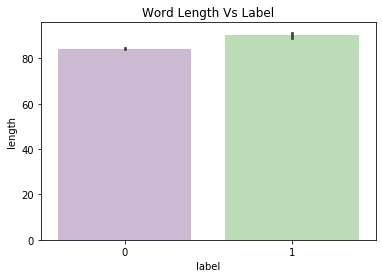

In [20]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig = plt.figure()
sns.barplot('label', 'length', data=train_tweets, palette='PRGn')
plt.title('Word Length Vs Label')
fig.savefig('plots/WordLengthVsLabel.png')

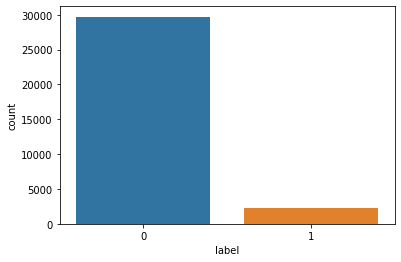

In [21]:
fig = plt.figure()
sns.countplot(x='label', data=train_tweets)
fig.savefig('plots/CountPlot.png')

# Feature Engineering

In [22]:
def form_sentence(tweet):
    # Generates the list of words in the tweet and removes punctuation
    blob = TextBlob(tweet)
    return ' '.join(blob.words)

def remove_stopwords(tweet):
    # Removes stopwords and words with unusual symbols
    tweet_list = [element for element in tweet.split() if element != 'user']
    clean_tokens = [token for token in tweet_list if re.match(r'[^\W\d]*$', token)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

def lemmatization(tweet_list):
    # Normalizing the words in tweets
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet_list:
        normalized_text = lem.lemmatize(word, 'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet

def text_preprocessing(tweet):
    new_tweet = form_sentence(tweet)
    no_stopwords_tweet = remove_stopwords(new_tweet)
    return lemmatization(no_stopwords_tweet)

In [23]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_preprocessing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_preprocessing)

In [24]:
train_tweets[train_tweets['label'] == 1].drop('tweet', axis=1).head()

,label,length,tweet_list
13,1,74,"[cnn, call, michigan, middle, school, wall, ch..."
14,1,101,"[comment, australia, opkillingbay, seashepherd..."
17,1,22,"[retweet, agree]"
23,1,47,"[lumpy, say, prove, lumpy]"
34,1,104,"[unbelievable, century, need, something, like,..."


# Training the model

In [25]:
# Defining features and labels
X = train_tweetseets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [26]:
# Splitting test and train sets
X_train, X_test, y_train, y_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [27]:
# Machine learning pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessing)),    # Strings to token integer counts
    ('tfidf', TfidfTransformer()),                            # Integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())                           # Train the Naive Bayes 
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x00000172DC07AB88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
predictions = pipeline.predict(X_test)
# Classification Report
print('Classification Report\n')
print(classification_report(predictions, y_test))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6315
           1       0.17      0.99      0.29        78

    accuracy                           0.94      6393
   macro avg       0.58      0.96      0.63      6393
weighted avg       0.99      0.94      0.96      6393



In [30]:
# Confusion Matrix
print('Confusion Matrix\n')
print(confusion_matrix(predictions, y_test))

Confusion Matrix

[[5937  378]
 [   1   77]]


In [31]:
# Accuracy score
print('Accuracy Score\n')
print(accuracy_score(predictions, y_test))

Accuracy Score

0.9407164085718754
